## 1D benchmark
To test the applicability of the developed pipeline, we create 1D Ackley function as follows: 

$$
f(x) = -a \exp(-b \lvert x \rvert) - \exp\left(\frac{1}{a} \cos(c x)\right) + a + \exp(1)
$$

on $x:[-5,5]$. The interval is discretized into 200 points and we assume that no data is available for $x:[-3.5,-2.5]\cup [-0.5,0.5]\cup [2.5,3.5]$. 
Then we use the devloepd pipeline to fit Fourier based functions on this masked data and reconstruct the whole data from it. 

### create test function (Ackley function)

In [1]:
import numpy as np


Mz = 201
# number of points
z1d = np.linspace(-5, 5, Mz)  # z-axis

# the Ackley function
# parameters of the function
a = 5
b = 0.2
c = 1.5 * np.pi
# function calculation
u1d = -a * np.exp(-b * np.abs(z1d)) - np.exp(1 / a * np.cos(c * z1d)) + a + np.exp(1)
# normalize the function between 0 and 1
u1d = (u1d - np.min(u1d)) / (np.max(u1d) - np.min(u1d))

# define mask
mask1d = np.ones(u1d.shape)
mask1d[30:50] = 0
mask1d[90:110] = 0
mask1d[150:170] = 0

# calcualte masked date
u1d_mask = u1d * mask1d

# compute kz0
kz = 2 * np.pi / (np.max(z1d) - np.min(z1d))

# define N and padding, q (q=0.9 mean 10% extra padding)
N = 11
q = 0.9

### Fourier decomposition and reconstruction

In [2]:
from mift.functions_1D import (
    efficient_unstructured_FFT_1D,
    efficient_unstructured_IFFT_point_1D,
)

# FFT decompoistion to compute [AA] and [BB] and [xx]
(A, b, coef) = efficient_unstructured_FFT_1D(u1d_mask, z1d, q * kz, N, mask1d)

# do IFFT to reconstruct the data in space domain
recon = efficient_unstructured_IFFT_point_1D(coef, z1d, q * kz, N)

### Visualization

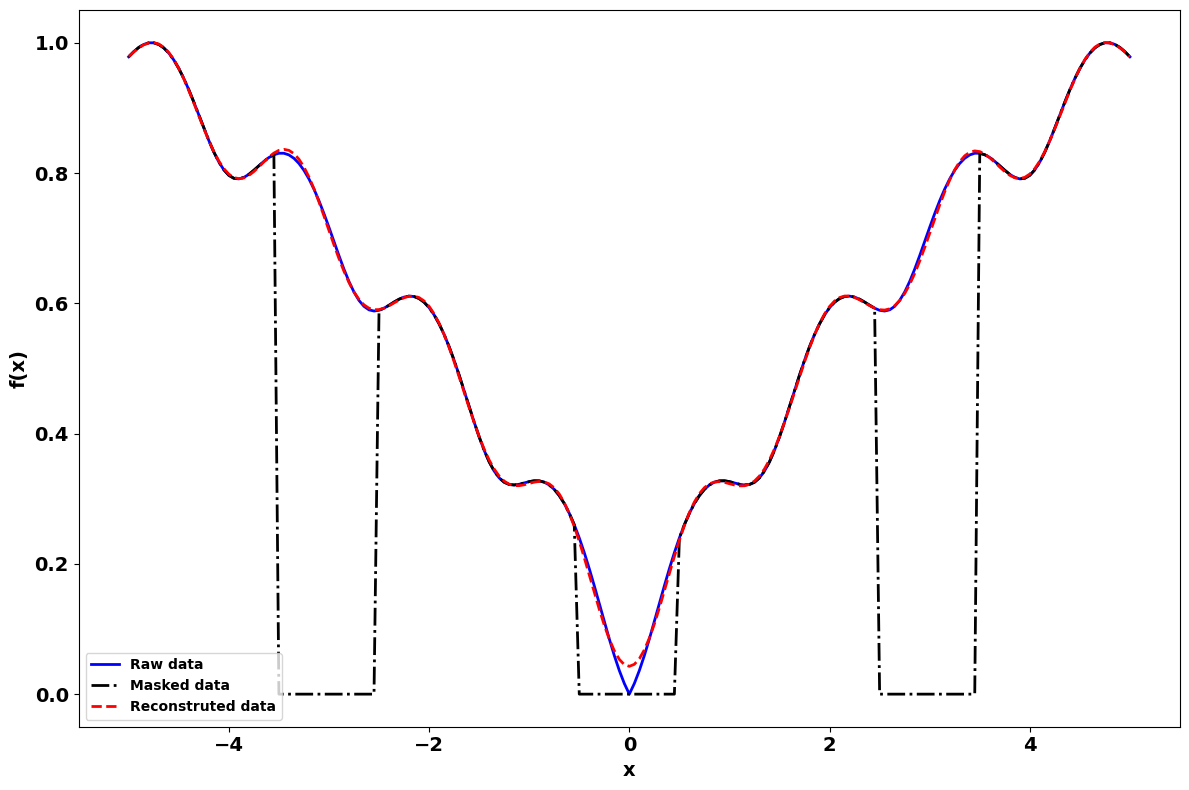

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(z1d, np.real(u1d), "-b", label="Raw data", linewidth=2)
plt.plot(z1d, np.real(u1d_mask), "-.k", label="Masked data", linewidth=2)
plt.plot(z1d, recon, "--r", label="Reconstruted data", linewidth=2)
plt.legend(prop={"weight": "bold"}, loc="lower left")
plt.ylabel("f(x)", fontsize=14, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.tight_layout()